# IS362 Final Project - Covid-19
![COVID banner](https://www.ci.wheatridge.co.us/ImageRepository/Document?documentId=31874)
## New York Vs. The United States.


***
First we must import the librairies we need to parce or data.

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

***
Here we will retrieve the `Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv` and enter it into a dataframe`covid19_deaths`. This data most current version is as of 4/30/20.

In [72]:
covid19_deaths = pd.read_csv('Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv', header=0)
covid19_deaths

,Data as of,Group,State,Indicator,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11),"Pneumonia, Influenza, and COVID-19 Deaths",Footnote
0,04/30/2020,By week,United States,Total Deaths,02/01/2020,04/25/2020,34521.0,713386,0.97,62725,15301.0,5821.0,86973.0,NaN
1,04/30/2020,By week,United States,Week-ending,02/01/2020,02/01/2020,0.0,57263,0.97,3687,0.0,469.0,4156.0,NaN
2,04/30/2020,By week,United States,Week-ending,02/08/2020,02/08/2020,0.0,57613,0.97,3671,0.0,494.0,4165.0,NaN
3,04/30/2020,By week,United States,Week-ending,02/15/2020,02/15/2020,0.0,56871,0.97,3692,0.0,516.0,4208.0,NaN
4,04/30/2020,By week,United States,Week-ending,02/22/2020,02/22/2020,0.0,56795,0.98,3556,0.0,536.0,4092.0,NaN
5,04/30/2020,By week,United States,Week-ending,02/29/2020,02/29/2020,5.0,56831,0.99,3620,3.0,619.0,4241.0,NaN
6,04/30/2020,By week,United States,Week-ending,03/07/2020,03/07/2020,25.0,56190,0.97,3719,14.0,583.0,4312.0,NaN
7,04/30/2020,By week,United States,Week-ending,03/14/2020,03/14/2020,49.0,53940,0.95,3674,25.0,578.0,4275.0,NaN
8,04/30/2020,By week,United States,Week-ending,03/21/2020,03/21/2020,487.0,53924,0.95,4138,224.0,495.0,4890.0,NaN
9,04/30/2020,By week,United States,Week-ending,03/28/2020,03/28/2020,2659.0,57299,1.03,5598,1220.0,407.0,7397.0,NaN


***
Now that we have our data frame lets take a look at the `Group` column, as that is how this data seeems to be sorted. We will take a look at the values that exsist with in this column.

In [73]:
covid19_deaths.Group.value_counts(dropna=False)

By state             54
By week              14
By age               12
By place of death     9
By sex                4
Name: Group, dtype: int64

We see that all the rows are divided amongst 5 distinct groups. So we will divided this dataframe into these groups, in to diffrent variables `bystate`, `byweek`, `byage`, `byplaceofdeath`, `bysex`.

***
Below we will create the `bystate` variable that will take all the rows that consist of the Group 'By state'. We then clean this data by taking only the column we need consisting of Covid deaths that is `All COVID-19 Deaths (U07.1)` and the states those deaths are in being the `State columns` and we will put this clean data into a ne variable `total_covid_deaths_bystate`. When reviewing the `covid19_deaths` variable i saw some `NaN` values so we need to serch for those aswell.

In [74]:
bystate = covid19_deaths[covid19_deaths['Group']=='By state']
total_covid_deaths_bystate = bystate[['State', 'All COVID-19 Deaths (U07.1)']]
total_covid_deaths_bystate[total_covid_deaths_bystate['All COVID-19 Deaths (U07.1)'].isnull()]

,State,All COVID-19 Deaths (U07.1)
28,Alaska,NaN
38,Hawaii,NaN
53,Montana,NaN
62,North Dakota,NaN
69,South Dakota,NaN
78,Wyoming,NaN


As we can see above, these are the values that have a `NaN` value for covid deaths. In order to have cleaner data we will convert these `NaN`s to `O`. We will do this in another new variable `total_covid_deaths_bystate_fillNA` as to not confuse our original data.

In [75]:
total_covid_deaths_bystate_fillNA=total_covid_deaths_bystate[['State','All COVID-19 Deaths (U07.1)']].fillna(value=0)

Lets just recheck our work to make sure we no longer have NaN values in the `total_covid_deaths_bystate_fillNA` variable.

In [76]:
total_covid_deaths_bystate_fillNA[total_covid_deaths_bystate_fillNA['All COVID-19 Deaths (U07.1)'].isnull()]

,State,All COVID-19 Deaths (U07.1)


Great. As we can see  we were returned and empty result, menaning we no longer have any `NaN` values in our `total_covid_deaths_bystate_fillNA`.

***
## By State:

![US Heat map 4/13/20](https://api.hub.jhu.edu/factory/sites/default/files/styles/hub_xlarge/public/map_top041420.jpg?itok=B3bPv10e)

Below we will chnage the structor of `total_covid_deaths_bystate_fillNA`. We will set the index to be the `State` names. 

Then we create yet another variable of this data called `dropUS` that will consist of removing the entry in the data that is the `United States`, as this is the combined total of all the states COVID-19 deaths in the dataframe.

After this we will then create a chart to visualize `dropUS` that will diplay COVID-19 Deaths by each state as of 4/30/20.

Text(0.5,1,'All U.S. Covid-19 Deaths By State')

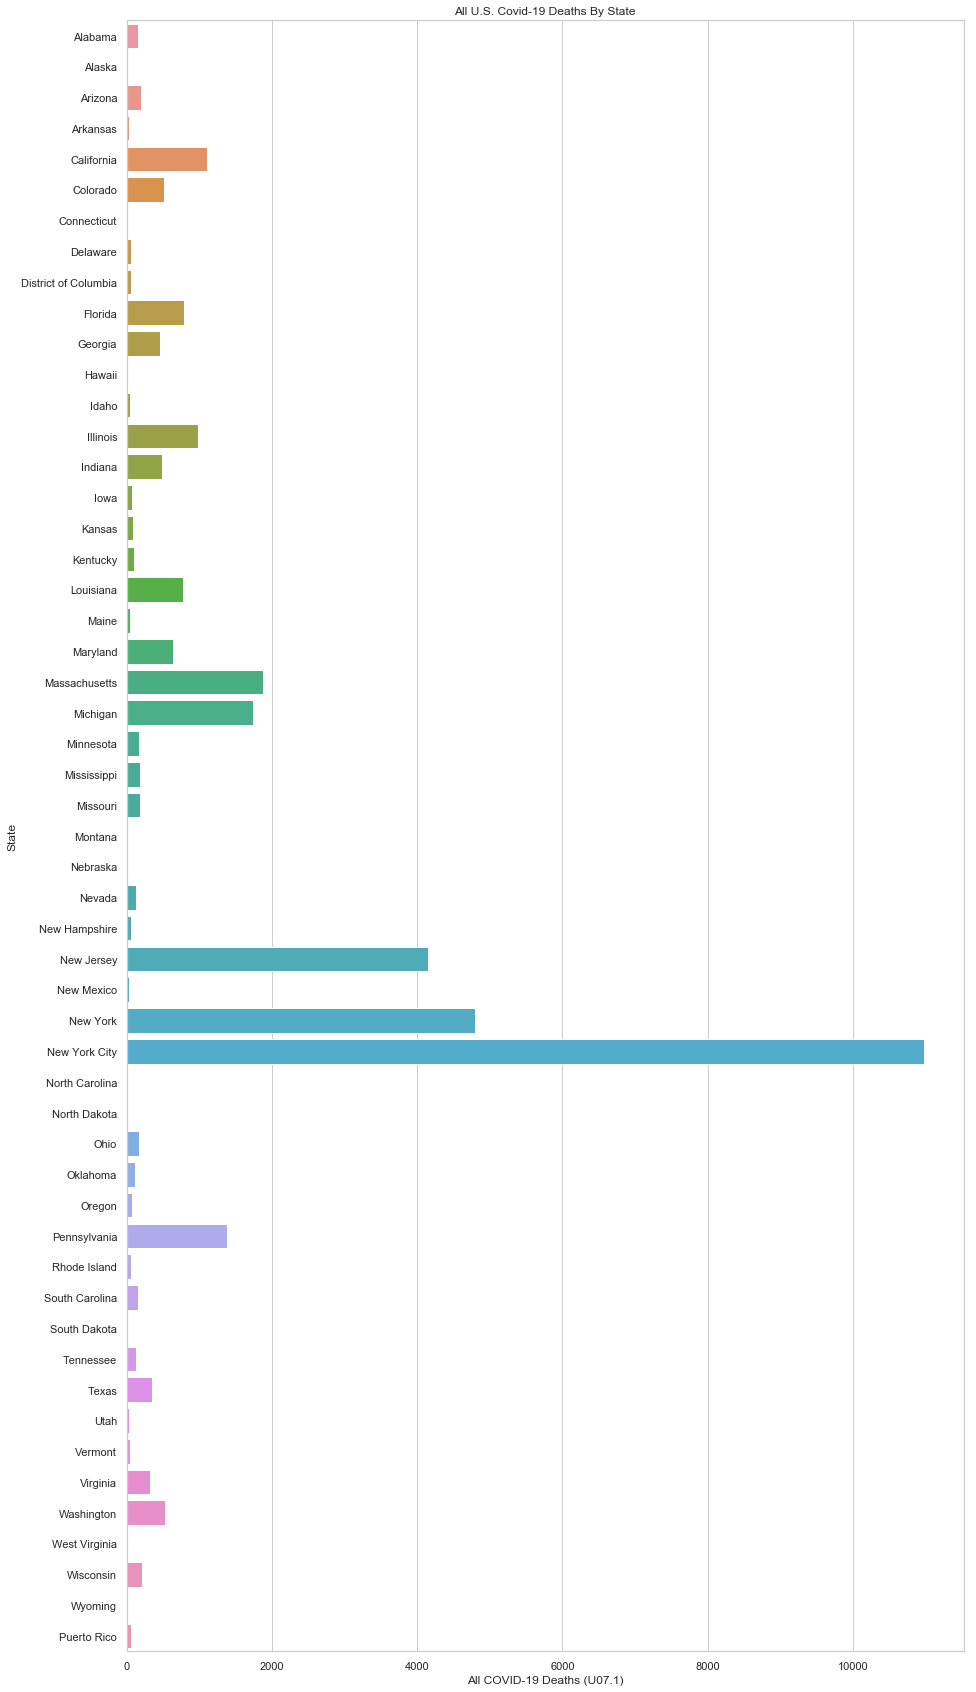

In [77]:
total_covid_deaths_bystate_fillNA.set_index('State', inplace=True)
dropUS= total_covid_deaths_bystate_fillNA.drop(['United States'])

sns.set(style="whitegrid")
plt.figure(figsize=(15,30))
g= sns.barplot(x="All COVID-19 Deaths (U07.1)", y=dropUS.index, data=dropUS)
plt.title('All U.S. Covid-19 Deaths By State')


As we can clearly see New York has far and away more COVID-19 Deaths thank any other state in the US. Only surpassed by the city of New York, that has more than double the COVID-19 Deaths than the rest of the state of New York. 

***
## By Week:

Below We will see when these deaths occured by Week and compare them to Deaths from all other causes.

Here we will Clean the data from `covid19_deaths` data fram but this time we will be grouping this data by the `Group` colum that contains the value `'By week'`.

We will then clean this data by creating the variable `byweekClean` that will only consist of the `By week` data columns `'End week'`, `'All COVID-19 Deaths (U07.1)'`, `'Deaths from All Causes'`.

We will then further clean the data in the new variable `byweekCleaner` by removing row `0` wich consist of the total number of Deaths for all weeks, we just want the deaths per week. Now wee will set the index for this data to be the `'End week'` date.

Now we can plot a staked bar chart to show this data visualy.

Text(0,0.5,'Number of Deaths')

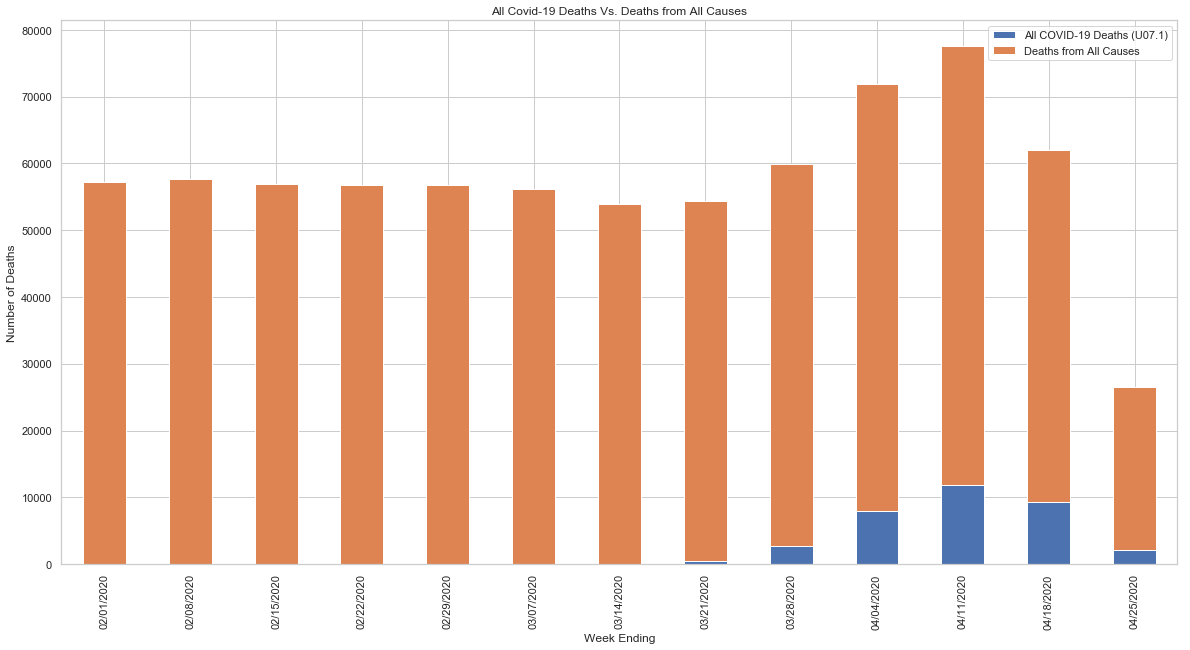

In [78]:
byweek = covid19_deaths[covid19_deaths['Group']=='By week']
byweekClean = byweek[['End week', 'All COVID-19 Deaths (U07.1)', 'Deaths from All Causes']]
byweekCleaner=byweekClean.drop([0])
byweekCleaner.set_index('End week', inplace=True)
byweekCleaner.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('All Covid-19 Deaths Vs. Deaths from All Causes')
plt.xlabel('Week Ending')
plt.ylabel('Number of Deaths')

As we can see from this chart a significant number of Covid deaths did not begin untill the week ending `3/21/20`. And the deatlyies week in the US being `4/11/20`.

Another distinction we can see is that COVID-19 is directly responasable for the raisied death rate in the US. However, we do see an anomoly of the total death rate in the US dramaticly droping in Week ending `4/25/20`. This could be posably becuse at this point we have been quarenteening the entire population so deaths from other aspects, like driving accidents etc., have dropped. Becuse every one is at home, less people are outside so deaths that may have occured, did not. We would need more data to confirm this theory. But it is quite intresting development.

***
## By Age:
Below We will see the death rate `By age` and compare them.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By age'` in the new variable `byage`.

We will then clean this `byage` data by creating the variable `byageClean` that will only consist of the `By age` data columns `'Indicator'`, `'All COVID-19 Deaths (U07.1)'`.

We will then further clean the data in the new variable `byageCleaner` by removing row `14` wich consist of the total number of Deaths for all ages, we just want the deaths by each age grouping. Now wee will set the index for this data to be the `'Indicator'` column.

Now we can plot a bar chart to show this data visualy.


Text(0,0.5,'Number of Deaths')

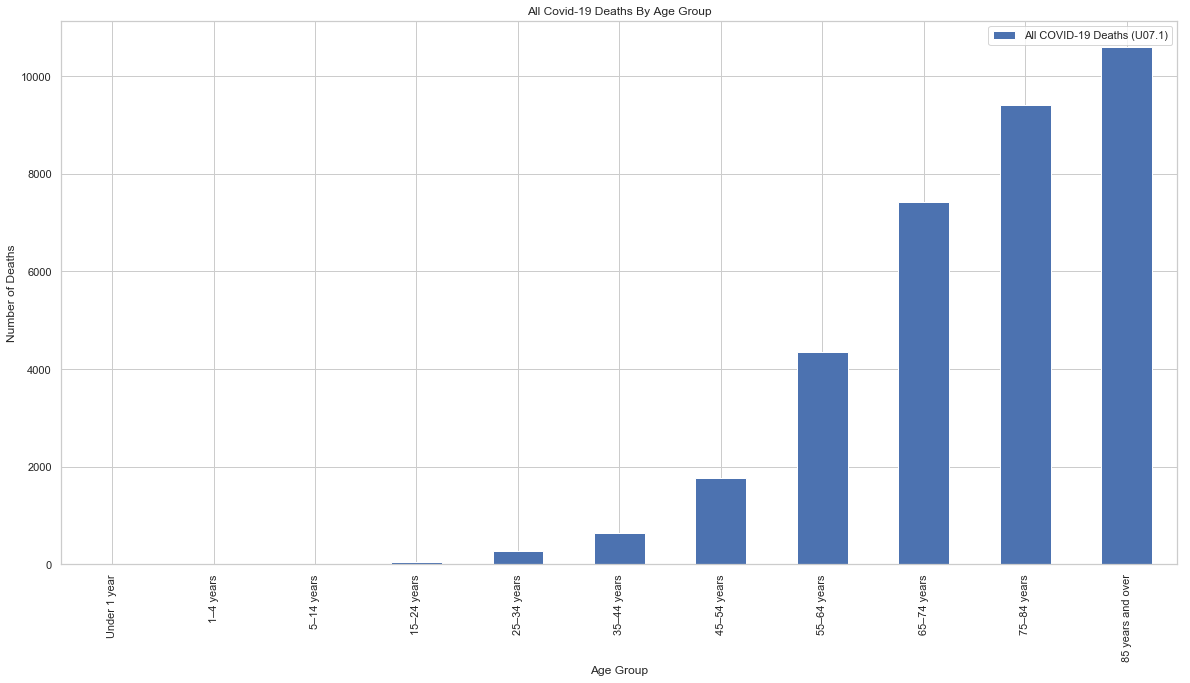

In [79]:
byage= covid19_deaths[covid19_deaths['Group']=='By age']
byageClean= byage[['Indicator', 'All COVID-19 Deaths (U07.1)']]
byageCleaner= byageClean.drop([14])
byageCleaner.set_index('Indicator', inplace=True)
byageCleaner.plot(kind='bar',figsize=(20,10))
plt.title('All Covid-19 Deaths By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')

As we can see from the chart age directly corrolates to the number of COVID-19 deaths as the age groups get older. This proves that those people abouve the age of 55 have the most serious risk of death should they contract COVID-19. This group should follow more stirngent quarentine mesures and isolate more. Especially if located in New York State.

***
## By Place of Death:
Below We will see the death rate `By place of death` and compare them.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By place of death'` in the new variable `byplaceofdeath`.

We will then clean this `byplaceofdeath` data by creating the variable `byplaceofdeathClean` that will only consist of the `By place of death` data columns `'Indicator'`, `'All COVID-19 Deaths (U07.1)'`.

We will then further clean the data in the new variable `byplaceofdeathCleaner` by removing row `Total` wich consist of the total number of Deaths for all places, we just want the deaths by each location grouping. Now wee will set the index for this data to be the `'Indicator'` column.

Now we can plot a bar chart to show this data visualy.

Text(0,0.5,'Place of Death')

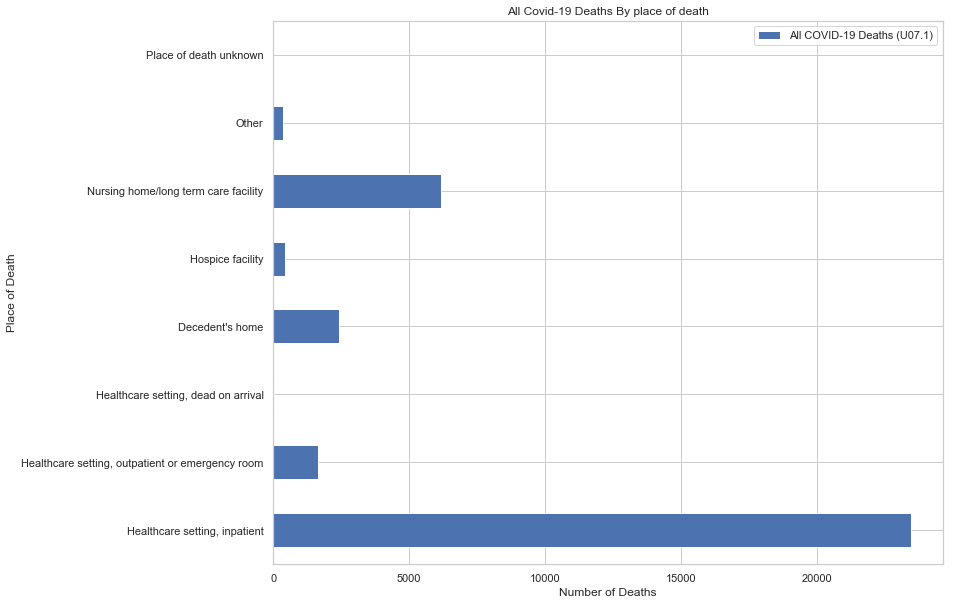

In [80]:
byplaceofdeath = covid19_deaths[covid19_deaths['Group']=='By place of death']
byplaceofdeathClean= byplaceofdeath[['Indicator', 'All COVID-19 Deaths (U07.1)']]
byplaceofdeathClean.set_index('Indicator', inplace=True)
byplaceofdeathCleaner = byplaceofdeathClean.drop(['Total'])
byplaceofdeathCleaner.plot(kind='barh',figsize=(12,10))
plt.title('All Covid-19 Deaths By place of death')
plt.xlabel('Number of Deaths')
plt.ylabel('Place of Death')

What this shows us, is the grim reality, that if you are a patient that is admited to a hospitale due to a severe COVID-19 diagnosis, you are more than 4 to 5 times likley to die in the hospatal, than any where else.

***
## By Sex:
Below We will see the death rate `By sex` and compare them.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By sex'` in the new variable `bysex`.

We will then clean this `bysex` data by creating the variable `bysexClean` that will only consist of the `By sex` data columns `'Indicator'`, `'All COVID-19 Deaths (U07.1)'`.

We will then further clean the data in the new variable `bysexCleaner` by removing row `Total deaths` wich consist of the total number of Deaths for all sexes, we just want the deaths by each sex grouping. Now wee will set the index for this data to be the `'Indicator'` column.

Now we can plot a bar chart to show this data visualy.

Text(0,0.5,'Sex')

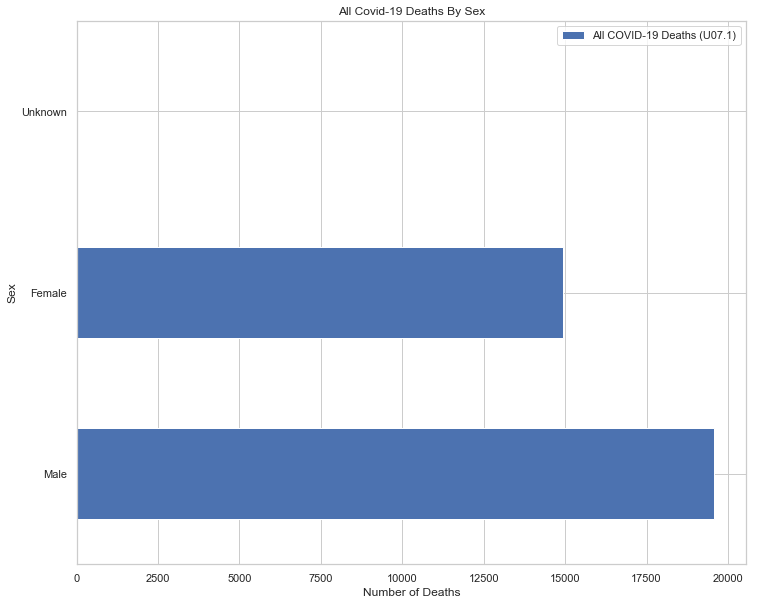

In [81]:
bysex = covid19_deaths[covid19_deaths['Group']=='By sex']
bysexClean = bysex[['Indicator', 'All COVID-19 Deaths (U07.1)']]
bysexClean.set_index('Indicator', inplace=True)
bysexCleaner= bysexClean.drop('Total deaths')
bysexCleaner.plot(kind='barh',figsize=(12,10))
plt.title('All Covid-19 Deaths By Sex')
plt.xlabel('Number of Deaths')
plt.ylabel('Sex')

This suprizingly shows us that men are about 20-25% more likley to die from a COVID-19 related illness then there female counterpart.

***
## New York State Infections by County:
![Cuomo Follow the data](https://www.northcountrypublicradio.org/news/images/4011d98a86_CuomoFlickr050920.jpg)

Since it seems that New York State is the epicenter of the outbreak, i thought it might be a good idea to see exsacly where , by County, that the outbreak is occuring in its highest numbers. This data was retrieved from the NY.Gov web site API @ `https://health.data.ny.gov/resource/xdss-u53e.csv`. It refrences the Number of Covid-19 Test done and confirmed Positive cases according to those test.

***
First we will create the dataframe `NYStateCovidTest` from the API.

In [82]:
NYStateCovidTest = pd.read_csv('https://health.data.ny.gov/resource/xdss-u53e.csv')
NYStateCovidTest

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
0,2020-05-12T00:00:00.000,Albany,15,1494,335,15246
1,2020-05-12T00:00:00.000,Allegany,2,44,39,885
2,2020-05-12T00:00:00.000,Bronx,236,41677,2678,124133
3,2020-05-12T00:00:00.000,Broome,3,382,291,5803
4,2020-05-12T00:00:00.000,Cattaraugus,0,61,77,1574
5,2020-05-12T00:00:00.000,Cayuga,0,60,45,1312
6,2020-05-12T00:00:00.000,Chautauqua,1,43,125,1916
7,2020-05-12T00:00:00.000,Chemung,1,132,282,3112
8,2020-05-12T00:00:00.000,Chenango,0,112,83,1713
9,2020-05-12T00:00:00.000,Clinton,1,78,53,1235


Since this data consist of each county in NYS, and those cases as of a particular date in the `test_date` column, we will need to retrive only the data that has acumulated as of `4/30/20`. Seeing as this data goes far beyond that date to `5/12/20`, we will need to modify the `test_date` column to a `datetime` object so we can serch for what we need easier.

***
Lets change `test_date` to datetime object.

In [83]:
NYStateCovidTest['test_date']= pd.to_datetime(NYStateCovidTest['test_date']).dt.strftime("%m/%d/%y")

***
Now we will select our needed columns.

In [84]:
NYStateCovidTestClean= NYStateCovidTest[['test_date','county','cumulative_number_of_positives']]



***
Lets set the `test_date` column to our index.

In [85]:
NYStateCovidTestClean.set_index('test_date', inplace=True)



***
Now we can select a prticular `test_date` to match our other data set that only goes to `4/30/20`

In [86]:
NYStateCovidTestClean_4_30_20 = NYStateCovidTestClean.loc['04/30/20']



***
Now that we have only the totals from each county as of 4/30/20, we can rid our selves of the `test_date` index and use the counties as our new index, in our variable `graf` that will be used to graf our chart of infections by County.

Text(0,0.5,'County')

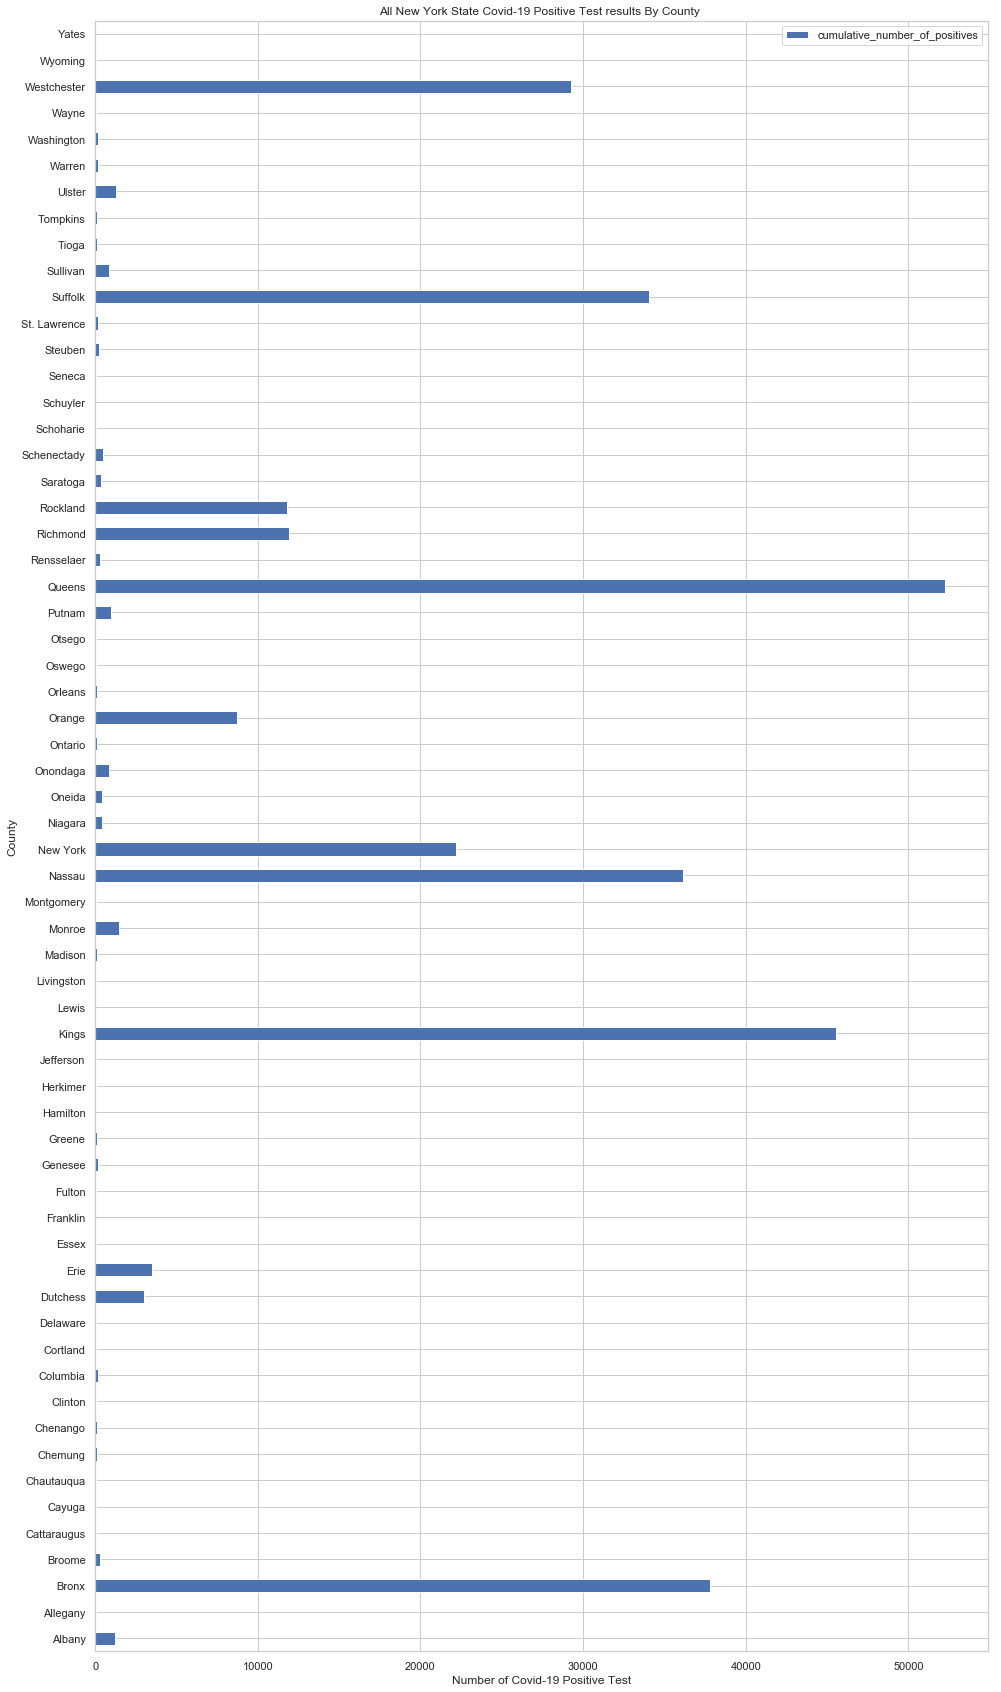

In [87]:
graf = NYStateCovidTestClean_4_30_20.set_index('county')
graf.plot(kind='barh', figsize=(16, 30))
plt.title('All New York State Covid-19 Positive Test results By County ')
plt.xlabel('Number of Covid-19 Positive Test')
plt.ylabel('County')

This chart shows us that NYC (consisting of Queens, New York, Bronx and Kings Counties), Long Island(consisting of Nassua and Suffolk Counties), and Westchester County are the most sever hit counties in New York state with confirmed COVID-19 test results. With all of thies counties the closest proximity to Manahattan where many of the people who live in thies areas commut to work, it is sad to say the relative distance that you work, or live, in relation to the Borogh of Manahattan, the greater at risk you are to catching COVID-19, With Queens having the highest infection rate.